Mean Absolute Error (MAE): 35788.061292436294
Mean Squared Error (MSE): 2806426667.247853
Root Mean Squared Error (RMSE): 52975.71771338122
R² Score: 0.6341189942328371


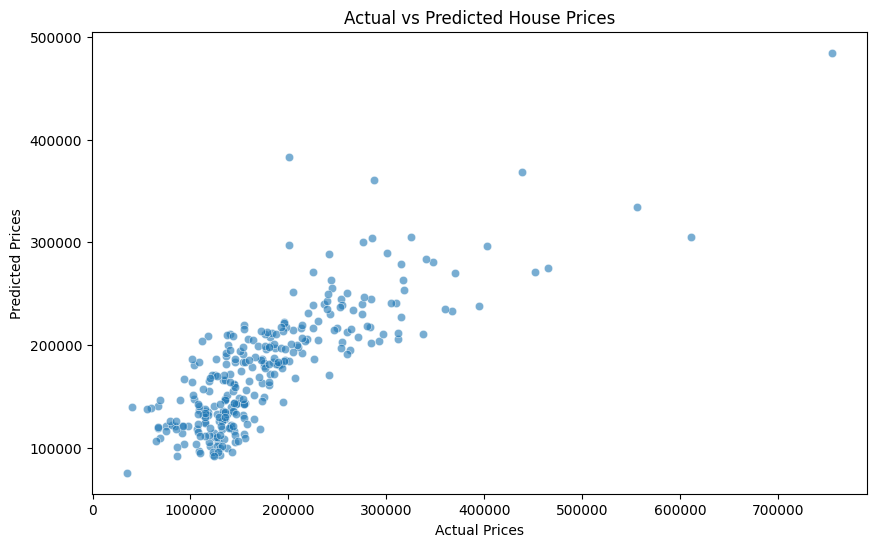

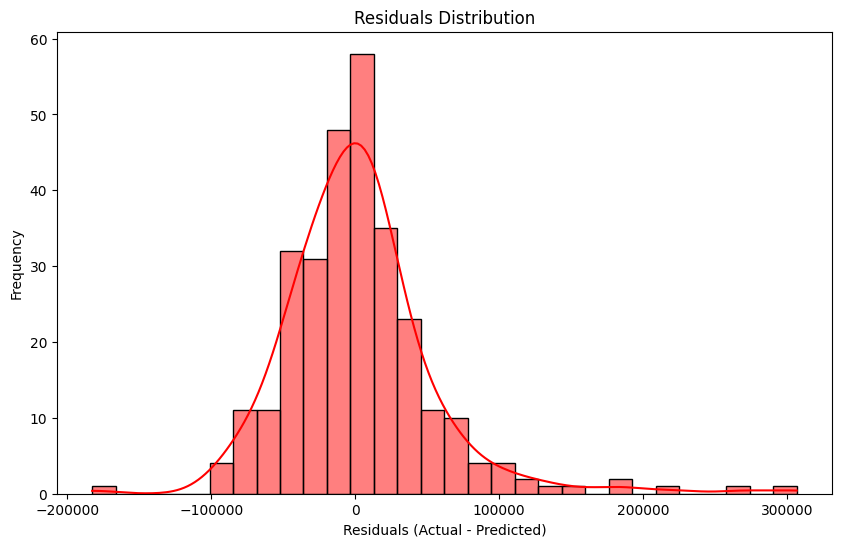

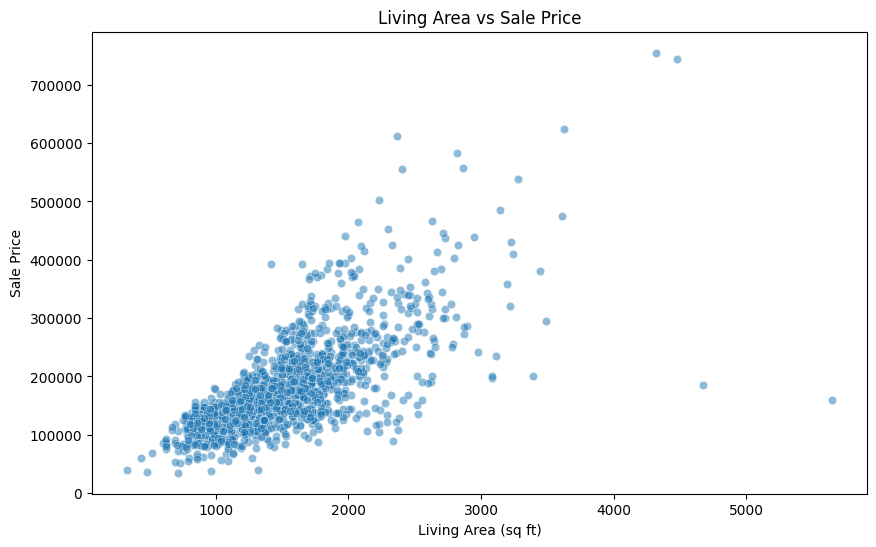

<ipython-input-8-1847d37210c4>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeff_df.index, y=coeff_df["Coefficient"], palette="Blues")


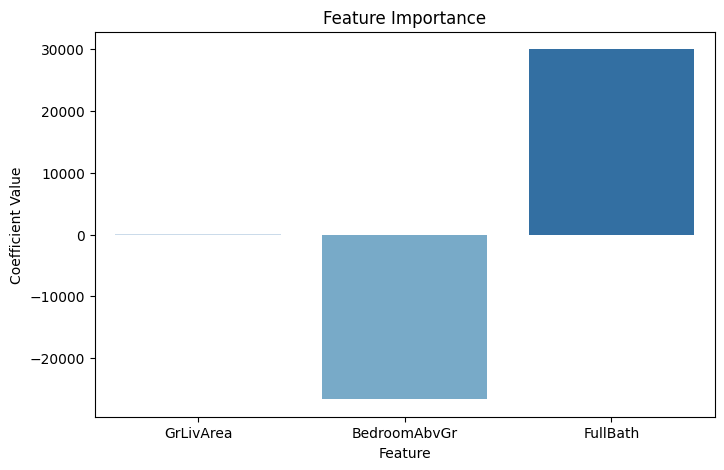

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/content/train.csv")  # Change path if using Google Drive

# Select relevant features
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
target = "SalePrice"

# Extract the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# ---------- MULTIPLE PLOTS ---------- #

# 1️⃣ Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()  # Ensures this plot is displayed

# 2️⃣ Residual Plot (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# 3️⃣ Feature vs Target (House Area vs Price)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"], alpha=0.5)
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Living Area vs Sale Price")
plt.show()

# 4️⃣ Feature Importance (Using Coefficients)
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
plt.figure(figsize=(8,5))
sns.barplot(x=coeff_df.index, y=coeff_df["Coefficient"], palette="Blues")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance")
plt.show()
